# Exploratory Data Analysis

### Course Description
When your dataset is represented as a table or a database, it's difficult to observe much about it beyond its size and the types of variables it contains. In this course, you'll learn how to use graphical and numerical techniques to begin uncovering the structure of your data. Which variables suggest interesting relationships? Which observations are unusual? By the end of the course, you'll be able to answer these questions and more, while generating graphics that are both insightful and beautiful.
### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables

### Note 3 - DataFrames

In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)

#cars
path_csv<-"https://assets.datacamp.com/production/repositories/537/datasets/c0366d5da5ee8dce49919a5443685cf2e50c6a96/cars04.csv"
#comics
path1_csv<-"https://assets.datacamp.com/production/repositories/537/datasets/8860af2c0ef67fc77a8c704a73bbb93a395debcf/comics.csv"
#immigrations
path2_csv<-"https://assets.datacamp.com/production/repositories/537/datasets/d6b811836c453d2afaaf76c6d62b592e673e93ae/immigration.csv"
#life_exp
path3_csv<-"https://assets.datacamp.com/production/repositories/537/datasets/e079a96a639aa10afc478359da45f2f75f7efd2e/life_exp_raw.csv"
#names
path4_txt<-"https://assets.datacamp.com/production/repositories/537/datasets/7dc95cdac26db11e7dd46542741435dbb09fb613/names.txt"
#income
path5_csv<-"https://assets.datacamp.com/production/repositories/537/datasets/813eb74f670b7dd1c7806375bc9607472fe976db/us_income_raw.csv"

cars<-read_csv(path_csv)
comics<-read_csv(path1_csv)
immigration<-read_csv(path2_csv)
life<-read_csv(path3_csv)
income<-read_csv(path5_csv)




Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  name = col_character(),
  sports_car = col_logical(),
  suv = col_logical(),
  wagon = col_logical(),
  minivan = col_logical(),
  pickup = col_logical(),
  all_wheel = col_logical(),
  rear_wheel = col_logical(),
  msrp = col_integer(),
  dealer_cost = col_integer(),
  eng_size = col_double(),
  ncyl = col_integer(),
  horsepwr = col_integer(),
  city_mpg = col_integer(),
  hwy_mpg = col_integer(),
  weight = col_integer(),
  wheel_base = col_integer(),
  length = col_integer(),
  width = col_integer()
)
Parsed with column specification:
cols(
  name = col_character(),
  id = col_character(),
  align = col_character(),
  eye = col_character(),
  hair = col_character(),
  gender = col_

## 1) Exploring Categorical Data

### 1.1) (video)  Exploring Categorical Data

#### 1.1.1) Contingency table review
In this chapter you'll continue working with the comics dataset introduced in the video. This is a collection of characteristics on all of the superheroes created by Marvel and DC comics in the last 80 years.

Let's start by creating a contingency table, which is a useful way to represent the total counts of observations that fall into each combination of the levels of categorical variables.

**Exercise**
The dataset has been loaded into your workspace as comics.

1. Type the name of the dataset to look at the rows and columns of the dataset.
2. View the levels() that the align variable can take.
3. View the levels() that the gender variable can take.
4. Create a contingency table of the same two variables.

*Answer*

    # Print the first rows of the data
    names(comics)

    # Check levels of align
    levels(comics$align)

    # Check the levels of gender
    levels(comics$gender)

    # Create a 2-way contingency table
    table(comics$align, comics$gender)
    

#### 1.1.2) Dropping levels
The contingency table from the last exercise revealed that there are some levels that have very low counts. To simplify the analysis, it often helps to drop such levels.

In R, this requires two steps: first filtering out any rows with the levels that have very low counts, then removing these levels from the factor variable with droplevels(). This is because the droplevels() function would keep levels that have just 1 or 2 counts; it only drops levels that don't exist in a dataset.

**Exercise**
The contingency table from the last exercise is available in your workspace as tab.

1. Load the dplyr package.
2. Print tab to find out which level of align has the fewest total entries.
4. 3. Use filter() to filter out all rows of comics with that level, then drop the unused level with droplevels(). Save the simplified dataset over the old one as comics.

*Answer*

    # Load dplyr
    library(dplyr)

    # Print tab
    tab

    # Remove align level
    comics_filtered <- comics %>%
      filter(align != "Reformed Criminals") %>%
      droplevels()

    # See the result
    comics_filtered

#### 1.1.3) Side-by-side barcharts
While a contingency table represents the counts numerically, it's often more useful to represent them graphically.

Here you'll construct two side-by-side barcharts of the comics data. This shows that there can often be two or more options for presenting the same data. Passing the argument position = "dodge" to geom_bar() says that you want a side-by-side (i.e. not stacked) barchart.

**Exercise**
1. Load the ggplot2 package.
2. Create a side-by-side barchart with align on the x-axis and gender as the fill aesthetic.
4. 3. Create another side-by-side barchart with gender on the x-axis and align as the fill aesthetic. Rotate the axis labels 90 degrees to help readability.

*Answer*

    # Load ggplot2
    library(ggplot2)

    # Create side-by-side barchart of gender by alignment
    ggplot(comics, aes(x = align, fill = gender)) + 
      geom_bar(position = "dodge")

    # Create side-by-side barchart of alignment by gender
    ggplot(comics, aes(x = gender, fill = align)) + 
      geom_bar(position = "dodge") +
      theme(axis.text.x = element_text(angle = 90))


### 1.2) (video) Counts vs. proportions
in the last section you will have noticed that rows count is very useful, but some times is much better the proportion, if we wanted to instead get a sense of the proportion of all cases that fell into each category,we can take the original table counts and provide it as input to the `prop.table `function like:

    option(scripen = 999, digits = 3) # simplify display format
    tab_cnt<-table(comics$id, comics$aling)
    prop.table(tab_cnt)
    
if we are curious about systematic associations between variables, we should look to canditional proportions like :

    prop.table(tab_cnt, 1)  #note the second argument specifying that you´d like to conditional on the rows (i.e rows sum 1)
    
to conditional on the columns instead change that argument to 2 like:    

    prop.table(tab_cnt, 2)  #note the second argument specifying that you´d like to conditional on the col (i.e col sum 1)

Of course the prop.tables is a good way to visualize your data however If we have a lot data the best idea it´is used a barchart graph but same way in necesary to change some things that we have seen in the previous modul.

#### 1.2.1) Counts vs. proportions (2)
Bar charts can tell dramatically different stories depending on whether they represent counts or proportions and, if proportions, what the proportions are conditioned on. To demonstrate this difference, you'll construct two barcharts in this exercise: one of counts and one of proportions.

**Exercise**
1. Create a stacked barchart of gender counts with align on the x-axis.
2. Create a stacked barchart of gender proportions with align on the x-axis by setting the position argument to geom_bar() equal to "fill".

*Answer*



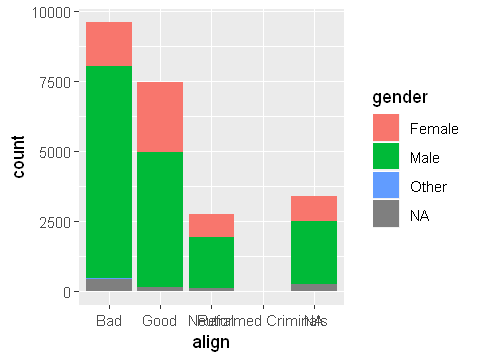

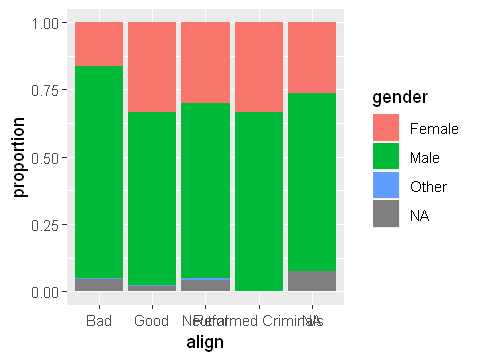

In [5]:
    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Plot of gender by align
ggplot(comics, aes(x = align, fill = gender)) +
  geom_bar()
  
# Plot proportion of gender, conditional on align
ggplot(comics, aes(x = align, fill = gender)) + 
  geom_bar(position = "fill") +
  ylab("proportion")

### 1.3) (video) Distribution of one variable
you might have noticed but until already , you have created graphs that illustrates a relationship between two variables, now we will be assuming one variable, so in this part we will see that a good way to display that information class  is throught bar chart.

#### 1.3.1 ) Marginal barchart
If you are interested in the distribution of alignment of all superheroes, it makes sense to construct a barchart for just that single variable.

You can improve the interpretability of the plot, though, by implementing some sensible ordering. Superheroes that are "Neutral" show an alignment between "Good" and "Bad", so it makes sense to put that bar in the middle.

**Exercise**
1. Reorder the levels of align using the factor() function so that printing them reads "Bad", "Neutral", then "Good".
2. Create a barchart of counts of the align variable.

*Answer*

    # Change the order of the levels in align
    comics$align <- factor(comics$align, 
                           levels = c("Bad", "Neutral", "Good"))

    # Create plot of align
    ggplot(comics, aes(x = align)) + 
      geom_bar()

#### 1.3.2) Conditional barchart
Now, if you want to break down the distribution of alignment based on gender, you're looking for conditional distributions.

You could make these by creating multiple filtered datasets (one for each gender) or by faceting the plot of alignment based on gender. As a point of comparison, we've provided your plot of the marginal distribution of alignment from the last exercise.

**Exercise**
1. Create a barchart of align faceted by gender

*Answer*

    # Plot of alignment broken down by gender
    ggplot(comics, aes(x = align)) + 
      geom_bar() +
      facet_wrap(~gender)


#### 1.3.3) Improve piechart
The piechart is a very common way to represent the distribution of a single categorical variable, but they can be more difficult to interpret than barcharts.

This is a piechart of a dataset called pies that contains the favorite pie flavors of 98 people. Improve the representation of these data by constructing a barchart that is ordered in descending order of count.

**Exercise**
1. Use the code provided to reorder the levels of flavor so that they're in descending order by count.
2. Create a barchart of flavor and orient the labels vertically so that they're easier to read. The default coloring may look drab by comparison, so change the fill of the bars to "chartreuse".

*Answer*

    # Put levels of flavor in decending order
    lev <- c("apple", "key lime", "boston creme", "blueberry", "cherry", "pumpkin", "strawberry")
    pies$flavor <- factor(pies$flavor, levels = lev)



    # Create barchart of flavor
    ggplot(pies, aes(x = flavor)) + 
      geom_bar(fill = "chartreuse") + 
      theme(axis.text.x = element_text(angle = 90))

## 2) Exploring Numerical Data
In this chapter, you will learn how to graphically summarize numerical data

### 2.1) (video) Exploring numerical data

#### 2.1.1) Faceted histogram
In this chapter, you'll be working with the `cars` dataset, which records characteristics on all of the new models of cars for sale in the US in a certain year. You will investigate the distribution of mileage across a categorial variable, but before you get there, you'll want to familiarize yourself with the dataset.

**Exercise**
The cars dataset has been loaded in your workspace.

1. Load the ggplot2 package.
2. View the size of the data and the variable types using str().
3. Plot a histogram of city_mpg faceted by suv, a logical variable indicating whether the car is an SUV or not.

*Answer*

    # Load package
    library(ggplot2)

    # Learn data structure
    str(cars)

    # Create faceted histogram
    ggplot(cars, aes(x = city_mpg)) +
      geom_histogram() +
      facet_wrap(~ suv)

#### 2.1.2) Boxplots and density plots
The mileage of a car tends to be associated with the size of its engine (as measured by the number of cylinders). To explore the relationship between these two variables, you could stick to using histograms, but in this exercise you'll try your hand at two alternatives: the box plot and the density plot.

**Exercise**
A quick look at unique(cars$ncyl) shows that there are more possible levels of ncyl than you might think. Here, restrict your attention to the most common levels.

1. Filter cars to include only cars with 4, 6, or 8 cylinders and save the result as common_cyl. The %in% operator may prove useful here.
2. Create side-by-side box plots of city_mpg separated out by ncyl.
3. Create overlaid density plots of city_mpg colored by ncyl.

*Answer*


Warning message:
"Removed 11 rows containing non-finite values (stat_boxplot)."

Warning message:
"Removed 11 rows containing non-finite values (stat_density)."

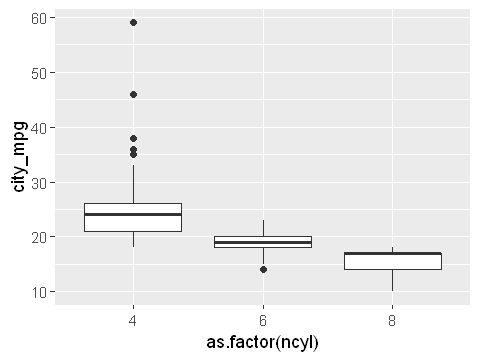

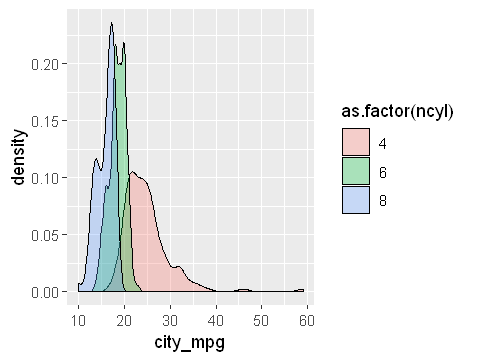

In [6]:
    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)


common_cyl <- filter(cars, ncyl %in% c(4,6,8))

# Create box plots of city mpg by ncyl
ggplot(common_cyl, aes(x = as.factor(ncyl), y = city_mpg)) +
  geom_boxplot()

# Create overlaid density plots for same data
ggplot(common_cyl, aes(x = city_mpg, fill = as.factor(ncyl))) +
  geom_density(alpha = .3)

### 2.2) (video) Distribution of one variable
If you are interested in a distribution of single numerical variable there are 3 ways yo can get there:

    1. Histogram
    2. Density plot

#### 2.2.1) Marginal and conditional histograms
Now, turn your attention to a new variable: `horsepwr`. The goal is to get a sense of the marginal distribution of this variable and then compare it to the distribution of horsepower conditional on the price of the car being less than $25,000.

You'll be making two plots using the "data pipeline" paradigm, where you start with the raw data and end with the plot.

**Exercise**
1. Create a histogram of the distribution of horsepwr across all cars and add an appropriate title. Start by piping in the raw dataset.
2. Create a second histogram of the distribution of horsepower, but only for those cars that have an msrp less than $25,000. Keep the limits of the x-axis so that they're similar to that of the first plot, and add a descriptive title.

*Answer*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2 rows containing missing values (geom_bar)."

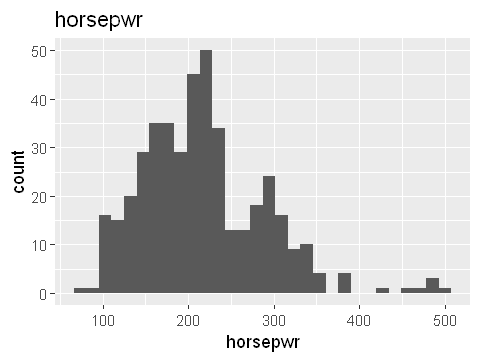

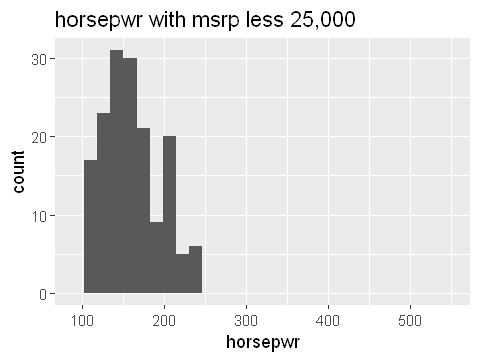

In [3]:
library(repr)

# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Create hist of horsepwr
cars %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram() +
  ggtitle(label = "horsepwr")
  

# Create hist of horsepwr for affordable cars
cars %>% 
  filter(msrp < 25000) %>%
  ggplot(aes(x = horsepwr)) +
  geom_histogram() +
  xlim(c(90, 550)) +
  ggtitle(label = "horsepwr with msrp less 25,000")

#### 2.2.2) Three binwidths
Before you take these plots for granted, it's a good idea to see how things change when you alter the binwidth. The binwidth determines how smooth your distribution will appear: the smaller the binwidth, the more jagged your distribution becomes. It's good practice to consider several binwidths in order to detect different types of structure in your data.

**Exercise**
Create the following three plots, adding a title to each to indicate the binwidth used:

1. A histogram of horsepower (i.e. horsepwr) with a binwidth of 3.
2. A second histogram of horsepower with a binwidth of 30.
3. A third histogram of horsepower with a binwidth of 60.

*Answer*

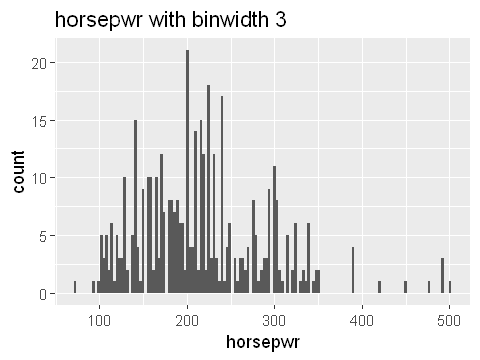

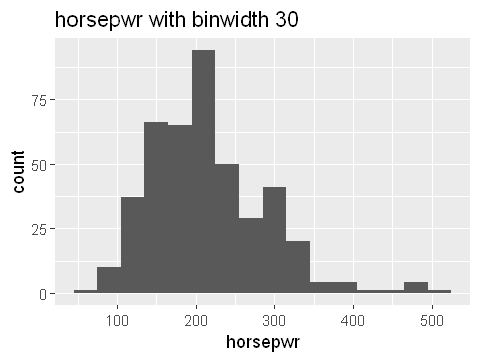

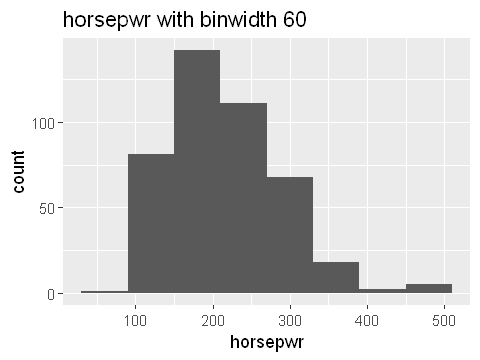

In [7]:
library(repr)

# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Create hist of horsepwr with binwidth of 3
cars %>%
  ggplot(aes(horsepwr)) +
  geom_histogram(binwidth = 3) +
  ggtitle(label = "horsepwr with binwidth 3")

# Create hist of horsepwr with binwidth of 30
cars %>%
  ggplot(aes(horsepwr)) +
  geom_histogram(binwidth = 30) +
  ggtitle(label = "horsepwr with binwidth 30")


# Create hist of horsepwr with binwidth of 60
cars %>%
  ggplot(aes(horsepwr)) +
  geom_histogram(binwidth = 60) +
  ggtitle(label = "horsepwr with binwidth 60")


### 2.3) Box plots
Note:If we want to display a single boxplot only need to specify `x = 1` into our "aes" parameter

### 2.3.1) Box plots for outliers
In addition to indicating the center and spread of a distribution, a box plot provides a graphical means to detect outliers. You can apply this method to the msrp column (manufacturer's suggested retail price) to detect if there are unusually expensive or cheap cars.

**Exercise**
1. Construct a box plot of msrp.
2. Exclude the largest 3-5 outliers by filtering the rows to retain cars less than $100,000. Save this reduced dataset as cars_no_out.
3. Construct a similar box plot of msrp using this reduced dataset. Compare the two plots.

*Answer*


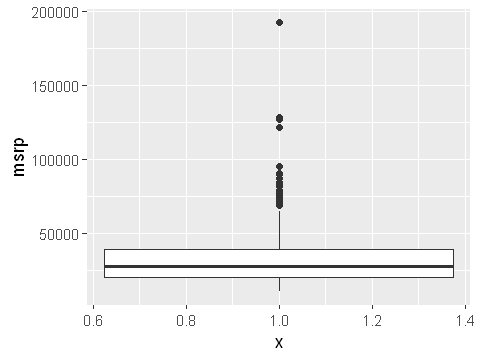

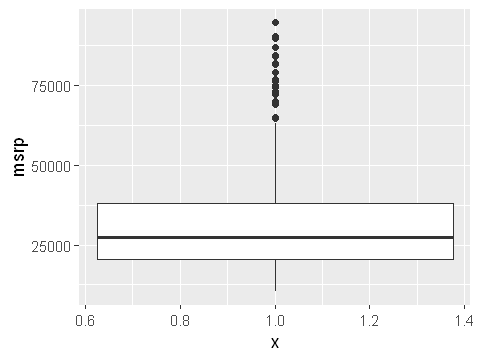

In [2]:
library(repr)

# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# Construct box plot of msrp
cars %>%
  ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot()

# Exclude outliers from data
cars_no_out <- cars %>%
  filter(msrp < 100000)

# Construct box plot of msrp using the reduced dataset
cars_no_out %>% 
ggplot(aes(x = 1, y = msrp)) +
  geom_boxplot()

#### 2.3.2) Plot selection
Consider two other columns in the cars dataset: city_mpg and width. Which is the most appropriate plot for displaying the important features of their distributions? Remember, both density plots and box plots display the central tendency and spread of the data, but the box plot is more robust to outliers.

**Exercise**
Use density plots or box plots to construct the following visualizations. For each variable, try both plots and submit the one that is better at capturing the important structure.

1. Display the distribution of city_mpg.
2. Display the distribution of width.

*Answer*


Warning message:
"Removed 14 rows containing non-finite values (stat_boxplot)."

Warning message:
"Removed 14 rows containing non-finite values (stat_density)."

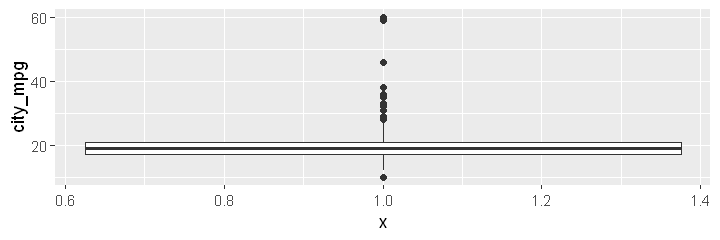

Warning message:
"Removed 28 rows containing non-finite values (stat_density)."

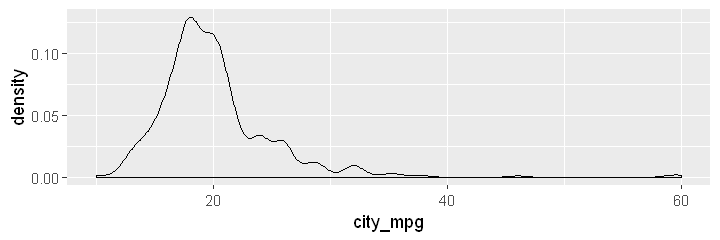

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."

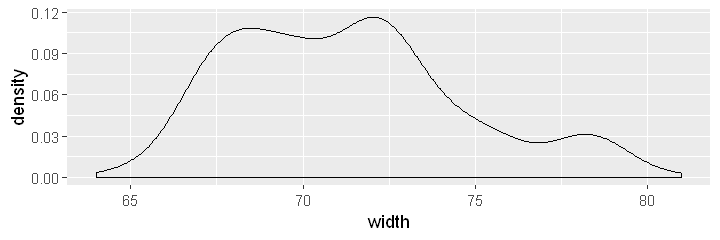

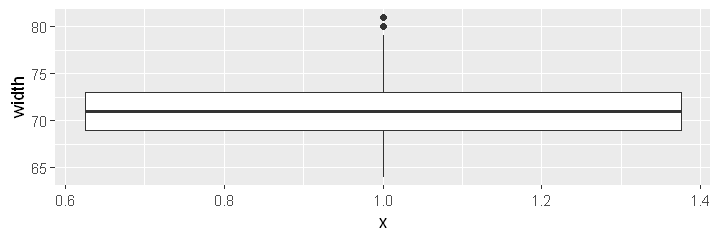

In [5]:
library(repr)

# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=2)

#first 
# Create plot of city_mpg
cars %>%
  ggplot(aes(x = 1, y = city_mpg)) +
  geom_boxplot()

#or 
cars %>%
  ggplot(aes(x = city_mpg)) +
  geom_density()
  

#second
# Create plot of width
cars %>% 
  ggplot(aes(x = width )) +
  geom_density()

# or 
cars %>% 
  ggplot(aes(x = 1, y = width )) +
  geom_boxplot()

### 2.4) (video) Visualization in higher dimensions


#### 2.4.1) 3 variable plot
Faceting is a valuable technique for looking at several conditional distributions at the same time. If the faceted distributions are laid out in a grid, you can consider the association between a variable and two others, one on the rows of the grid and the other on the columns.

**Exercise**
common_cyl, which you created to contain only cars with 4, 6, or 8 cylinders, is available in your workspace.

1. Using common_cyl, create a histogram of hwy_mpg.
2. Grid-facet the plot rowwise by ncyl and columnwise by suv.
3. Add a title to your plot to indicate what variables are being faceted on.

*Answer*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."

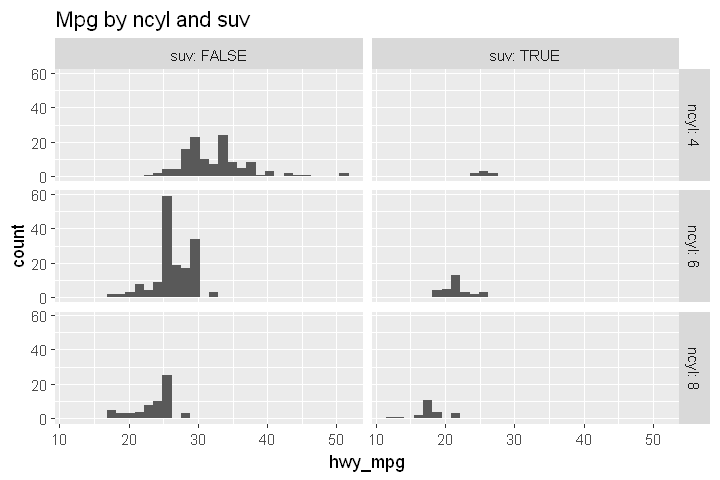

In [9]:
library(repr)

# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=4)

# Facet hists using hwy mileage and ncyl

common_cyl %>%
  ggplot(aes(x = hwy_mpg)) +
  geom_histogram() +
  facet_grid(ncyl ~ suv , labeller = label_both) +
  ggtitle("Mpg by ncyl and suv")


## 3) Numerical Summaries
Now that we've looked at exploring categorical and numerical data, you'll learn some useful statistics for describing distributions of data

### 3.1) (video) Measures of center

#### 3.1.2) Calculate center measures
Throughout this chapter, you will use data from `gapminder`, which tracks demographic data in countries of the world over time. To learn more about it, you can bring up the help file with `?gapminder`.

For this exercise, focus on how the life expectancy differs from continent to continent. This requires that you conduct your analysis not at the country level, but aggregated up to the continent level. This is made possible by the one-two punch of group_by() and summarize(), a very powerful syntax for carrying out the same analysis on different subsets of the full dataset.

**Exercise**
1. Create a dataset called gap2007 that contains only data from the year 2007.
2. Using gap2007, calculate the mean and median life expectancy for each continent. Don't worry about naming the new columns produced by summarize().
3. confirm the trends that you see in the medians by generating side-by-side box plots of life expectancy for each continent.

*Answer*

continent,mean(lifeExp),median(lifeExp)
Africa,54.80604,52.9265
Americas,73.60812,72.8990
Asia,70.72848,72.3960
Europe,77.64860,78.6085
Oceania,80.71950,80.7195


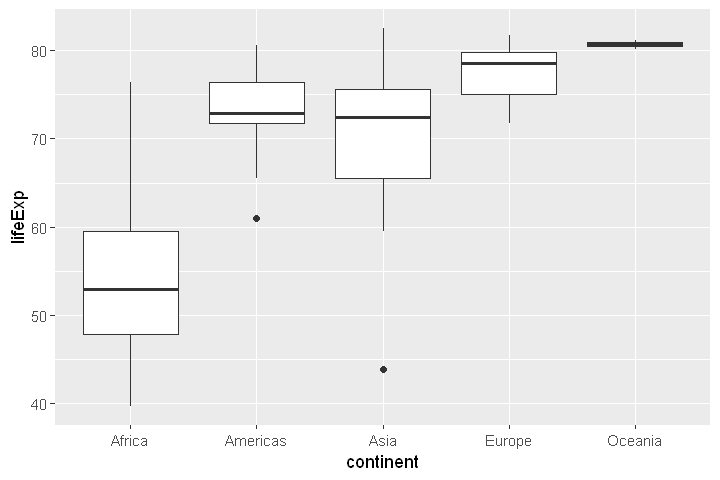

In [8]:
library("gapminder")
data("gapminder")


library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=4)


# Create dataset of 2007 data
gap2007 <- filter(gapminder, year == 2007)

# Compute groupwise mean and median lifeExp
gap2007 %>%
  group_by(continent) %>%
  summarize( mean(lifeExp),
            median(lifeExp))

# Generate box plots of lifeExp for each continent
gap2007 %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

**Exercise**
*Answer*

### 3.2) (video) Measures of variability 

#### 3.2.2) Calculate spread measures
Let's extend the powerful group_by() and summarize() syntax to measures of spread. If you're unsure whether you're working with symmetric or skewed distributions, it's a good idea to consider a robust measure like IQR in addition to the usual measures of variance or standard deviation.

**Exercise**
The gap2007 dataset that you created in an earlier exercise is available in your workspace.

1. For each continent in gap2007, summarize life expectancies using the sd(), the IQR(), and the count of countries, n(). No need to name the new columns produced here. The n() function within your summarize() call does not take any arguments.
2. Graphically compare the spread of these distributions by constructing overlaid density plots of life expectancy broken down by continent

*Answer*

continent,sd(lifeExp),IQR(lifeExp),n()
Africa,9.6307807,11.61025,52
Americas,4.4409476,4.63200,25
Asia,7.9637245,10.15200,33
Europe,2.9798127,4.78250,30
Oceania,0.7290271,0.51550,2


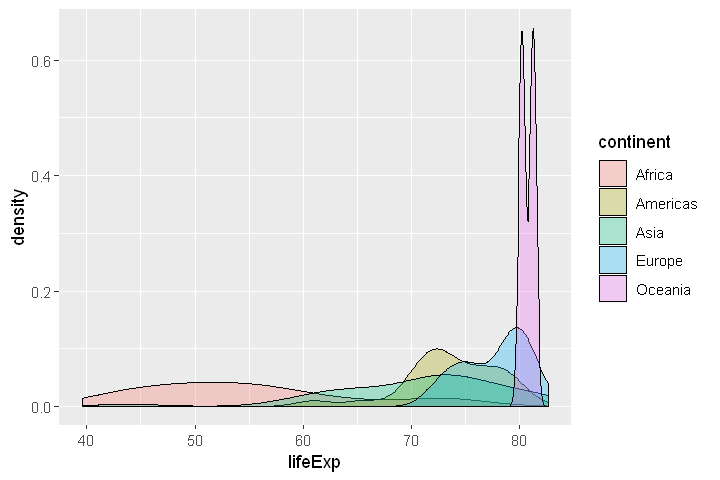

In [3]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=4)


# Compute groupwise measures of spread
gap2007 %>%
  group_by(continent) %>%
  summarize(sd(lifeExp),
            IQR(lifeExp),
            n())

# Generate overlaid density plots
gap2007 %>%
  ggplot(aes(x = lifeExp, fill = continent)) +
  geom_density(alpha = 0.3)

#### 3.2.3) Choose measures for center and spread
Consider the density plots shown here. What are the most appropriate measures to describe their centers and spreads? In this exercise, you'll select the measures and then calculate them.

**Exercise**
Using the shapes of the density plots, calculate the most appropriate measures of center and spread for the following:

1. The distribution of life expectancy in the countries of the Americas. Note you'll need to apply a filter here.
2. The distribution of country populations across the entire gap2007 dataset.


Warning message:
"package 'gridExtra' was built under R version 3.5.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



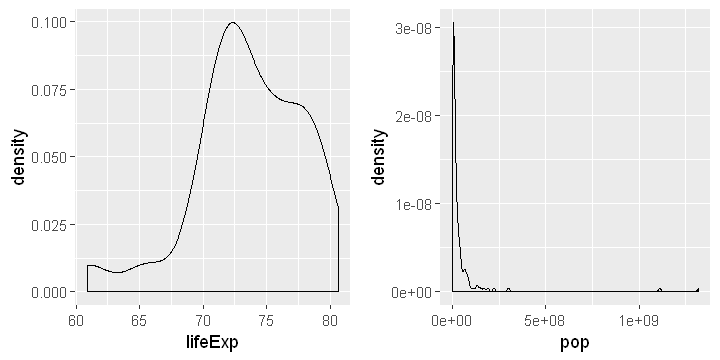

In [12]:
library(repr)
library(gridExtra)


# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=3)

p1<-gap2007 %>%
  filter(continent == "Americas") %>%   ggplot(aes(x = lifeExp)) +
  geom_density(alpha = 0.3)

p2<-gap2007 %>% ggplot(aes(x = pop)) + geom_density(alpha = 0.3)

grid.arrange(p1, p2, nrow=1)

*Answer*

In [13]:
# Compute stats for lifeExp in Americas
gap2007 %>%
  filter(continent == "Americas") %>%
  summarize(mean(lifeExp),
            sd(lifeExp))

# Compute stats for population
gap2007 %>%
  summarize(median(pop),
            IQR(pop))

mean(lifeExp),sd(lifeExp)
73.60812,4.440948


median(pop),IQR(pop)
10517531,26702008


### 3.3) (video) Shape and transformations
There are 4 generally four characteristics of distributions that are of interest 

1. center: mean, mode, median
2. spread: varianza, sd, IQR, range
3. shape of distributions: we can described by modality and skew.
4. Outliers

where modality of a distributions is the number of prominent humps that show up in the distributions, if there is a single model, as a bell-curve, it´s called unimodal, if there are two prominent modes, it´s called bimodal, if it has three modes or more, the convention is to refer to it as multimodal, the last case it´s when we don´t have modes, it´s called uniform

The skew, to refer if a distribution has a long tail that streches out to the right, it´s referred to as "right-skewed" or if that long tail stretches out to the left, its referred to as "left-skewed". otherwise it´s called symmetric distributions.

#### 3.3.2) Transformations
Highly skewed distributions can make it very difficult to learn anything from a visualization. Transformations can be helpful in revealing the more subtle structure.

Here you'll focus on the population variable, which exhibits strong right skew, and transform it with the natural logarithm function (log() in R).

**Exercise**
Using the gap2007 data:

1. Create a density plot of the population variable.
2. Mutate a new column called log_pop that is the natural log of the population and save it back into gap2007.
3. Create a density plot of your transformed variable

*Answer*

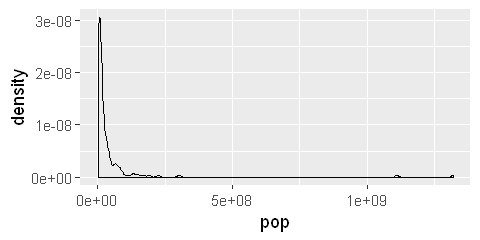

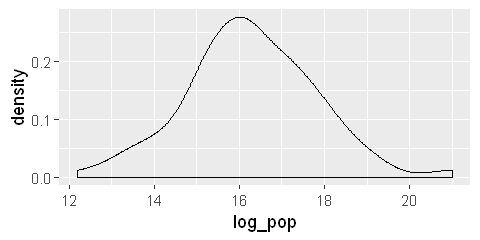

In [11]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=2)

# Create density plot of old variable
gap2007 %>%
  ggplot(aes(x = pop)) +
  geom_density()

# Transform the skewed pop variable
gap2007 <- gap2007 %>%
  mutate(log_pop = log(pop))

# Create density plot of new variable
gap2007 %>%
  ggplot(aes(x = log_pop)) +
  geom_density()



### 3.4) Outliers
Identify outliers
Consider the distribution, shown here, of the life expectancies of the countries in Asia. The box plot identifies one clear outlier: a country with a notably low life expectancy. Do you have a guess as to which country this might be? Test your guess in the console using either min() or filter(), then proceed to building a plot with that country removed


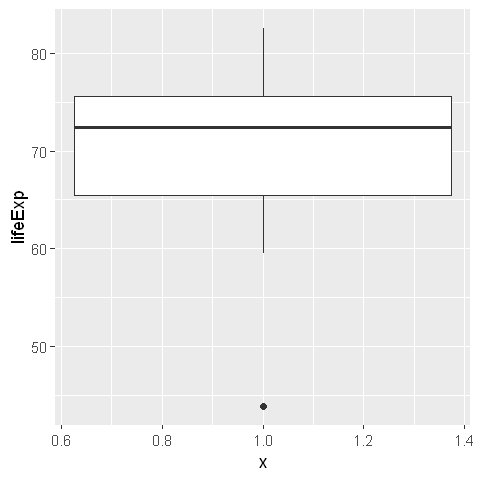

In [19]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=4)

gap2007 %>% 
  filter(continent == "Asia") %>%  
  ggplot(aes(x = 1 , y = lifeExp)) + geom_boxplot()


**Exercise**
gap2007 is still available in your workspace.

1. Apply a filter so that it only contains observations from Asia, then create a new variable called is_outlier that is TRUE for countries with life expectancy less than 50. Assign the result to gap_asia.
2. Filter gap_asia to remove all outliers, then create another box plot of the remaining life expectancies.

*Answer*

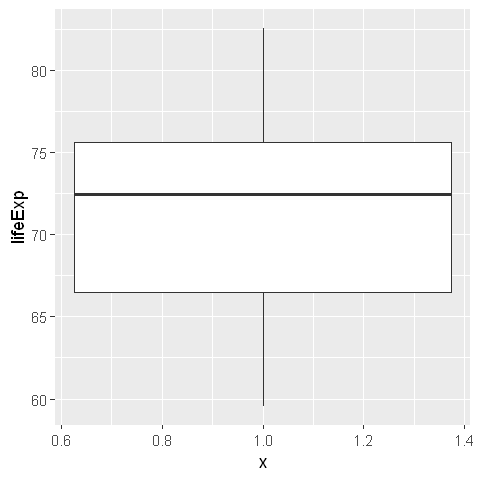

In [20]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=4)

# Filter for Asia, add column indicating outliers
gap_asia <- gap2007 %>%
  filter(continent == "Asia") %>%
  mutate(is_outlier = lifeExp < 50)

# Remove outliers, create box plot of lifeExp
gap_asia %>%
  filter(!is_outlier) %>%
  ggplot(aes(x = 1, y = lifeExp)) +
  geom_boxplot()

## 4) Case Study
Apply what you've learned to explore and summarize a real world dataset in this case study of email spam.

### 4.1) (video) Introducing the data

#### 4.1.1) Spam and num_char
Is there an association between spam and the length of an email? You could imagine a story either way:

1. Spam is more likely to be a short message tempting me to click on a link, or
2. My normal email is likely shorter since I exchange brief emails with my friends all the time.

Here, you'll use the email dataset to settle that question. Begin by bringing up the help file and learning about all the variables with ?email.

As you explore the association between spam and the length of an email, use this opportunity to try out linking a dplyr chain with the layers in a ggplot2 object.

**Exercise**
Using the email dataset

1. Load the packages ggplot2, dplyr, and openintro.
2. Compute appropriate measures of the center and spread of num_char for both spam and not-spam using group_by() and summarize(). No need to name the new columns created by summarize().
3. Construct side-by-side box plots to visualize the association between the same two variables. It will be useful to mutate()

*Answer*

Warning message:
"package 'openintro' was built under R version 3.5.2"Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following objects are masked _by_ '.GlobalEnv':

    cars, immigration

The following object is masked from 'package:ggplot2':

    diamonds

The following objects are masked from 'package:datasets':

    cars, trees



spam,median(num_char),IQR(num_char)
0,6.831,13.58225
1,1.046,2.81800


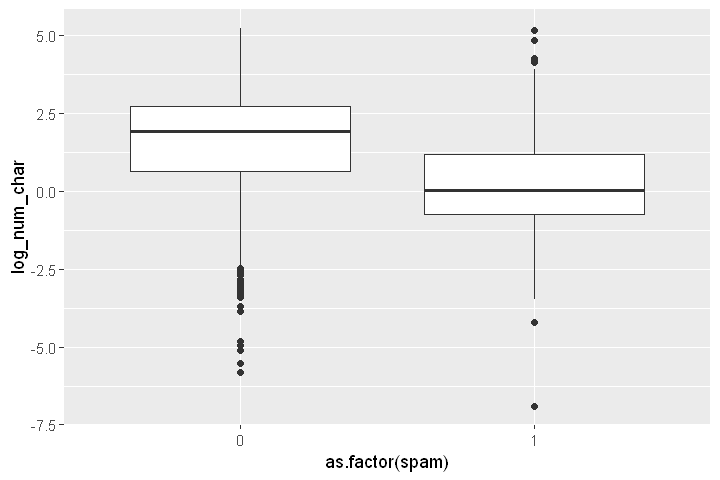

In [2]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=4)

# Load packages
library(dplyr)
library(ggplot2)
library(openintro) #here is email dataset
data("email")


# Compute summary statistics
email %>%
  group_by(spam) %>%
  summarize(median(num_char),IQR(num_char))

# Create plot
email %>%
  mutate(log_num_char = log(num_char)) %>%
  ggplot(aes(x = as.factor(spam), y = log_num_char)) +
  geom_boxplot()

#### 4.1.3) Spam and !!!
Let's look at a more obvious indicator of spam: exclamation marks. exclaim_mess contains the number of exclamation marks in each message. Using summary statistics and visualization, see if there is a relationship between this variable and whether or not a message is spam.

Experiment with different types of plots until you find one that is the most informative. Recall that you've seen:

    Side-by-side box plots
    Faceted histograms
    Overlaid density plots

**Exercise**
The email dataset is still available in your workspace.

1. Calculate appropriate measures of the center and spread of exclaim_mess for both spam and not-spam using group_by() and summarize().
2. Construct an appropriate plot to visualize the association between the same two variables, adding in a log-transformation step if necessary.

**If you decide to use a log transformation, remember that log(0) is -Inf in R, which isn't a very useful value! You can get around this by adding a small number (like 0.01) to the quantity inside the log() function. This way, your value is never zero. This small shift to the right won't affect your results.**

*Answer*

spam,mean(exclaim_mess),IQR(exclaim_mess)
0,6.508160,5
1,7.321526,1


Warning message:
"Removed 1435 rows containing non-finite values (stat_density)."

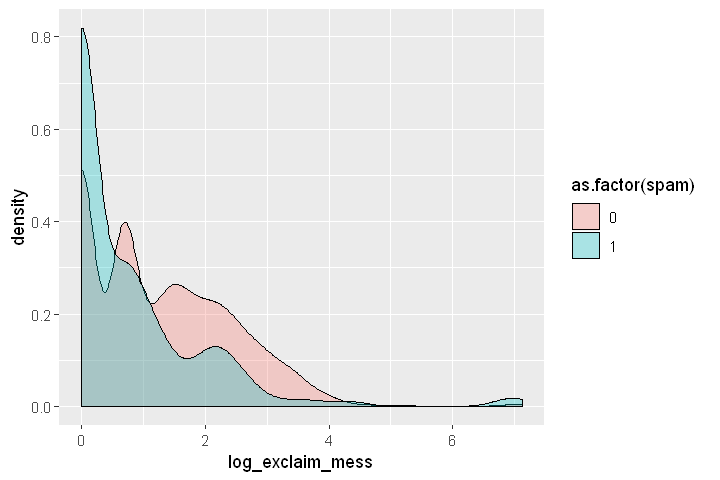

In [6]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=6, repr.plot.height=4)

# Compute center and spread for exclaim_mess by spam
email %>%
group_by(spam) %>%
summarize(mean(exclaim_mess), IQR(exclaim_mess))

# Create plot for spam and exclaim_mess
email %>%
mutate(log_exclaim_mess = log(exclaim_mess)) %>%
ggplot(aes(x = log_exclaim_mess, fill = as.factor(spam))) +
geom_density(alpha = .3)


### (video) 4.2 Check-In 1

#### 4.2.1) Collapsing levels
If it was difficult to work with the heavy skew of exclaim_mess, the number of images attached to each email (image) poses even more of a challenge. Run the following code at the console to get a sense of its distribution:

    table(email$image)
    
Recall that this tabulates the number of cases in each category (so there were 3811 emails with 0 images, for example). Given the very low counts at the higher number of images, let's collapse image into a categorical variable that indicates whether or not the email had at least one image. In this exercise, you'll create this new variable and explore its association with spam.

**Exercise**
Starting with email, form a continuous chain that links together the following tasks:

1. Create a new variable called has_image that is TRUE where the number of images is greater than zero and FALSE otherwise.
2. Create an appropriate plot with email to visualize the relationship between has_image and spam.

*Answer*

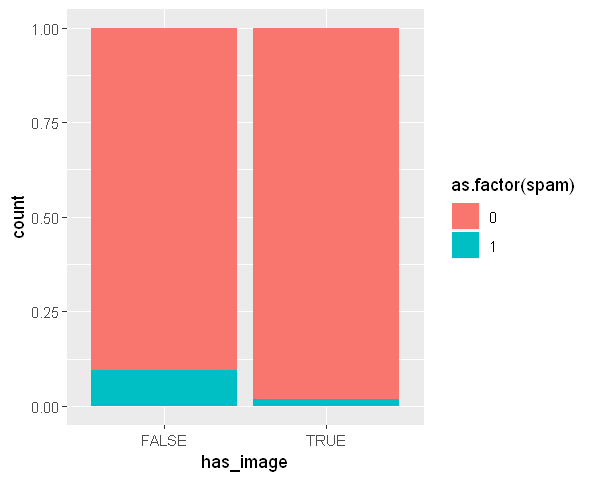

In [5]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=5, repr.plot.height=4)

email %>%
  mutate(has_image = image > 0) %>%
  ggplot(aes(x = has_image, fill = as.factor(spam))) +
  geom_bar(position = "fill") 

#### 4.2.2) Data Integrity
In the process of exploring a dataset, you'll sometimes come across something that will lead you to question how the data were compiled. For example, the variable num_char contains the number of characters in the email, in thousands, so it could take decimal values, but it certainly shouldn't take negative values.

You can formulate a test to ensure this variable is behaving as we expect:

    email$num_char < 0
    
If you run this code at the console, you'll get a long vector of logical values indicating for each case in the dataset whether that condition is TRUE. Here, the first 1000 values all appear to be FALSE. To verify that all of the cases indeed have non-negative values for num_char, we can take the sum of this vector:

    sum(email$num_char < 0)
    
This is a handy shortcut. When you do arithmetic on logical values, R treats TRUE as 1 and FALSE as 0. Since the sum over the whole vector is zero, you learn that every case in the dataset took a value of FALSE in the test. That is, the num_char column is behaving as we expect and taking only non-negative values.

**Exercise**
Consider the variables `image` and `attach`. You can read about them with `?email`, but the help file is ambiguous: do attached images count as attached files in this dataset?

Design a simple test to determine if images count as attached files. This involves creating a logical condition to compare the values of the two variables, then using `sum()` to assess every case in the dataset. Recall that the logical operators are `<` for less than, `<= `for less than or equal to, `>` for greater than, `>=` for greater than or equal to, and `==` for equal to.

*Answer*

    # Test if images count as attachments
    sum(email$image>0 && email$attach>0)

#### 4.2.3) Answering questions with chains
When you have a specific question about a dataset, you can find your way to an answer by carefully constructing the appropriate chain of R code. For example, consider the following question:

    "Within non-spam emails, is the typical length of emails shorter for those that were sent to multiple people?"

This can be answered with the following chain:

    email %>%
       filter(spam == "not-spam") %>%
       group_by(to_multiple) %>%
       summarize(median(num_char))
   
The code makes it clear that you are using num_char to measure the length of an email and median() as the measure of what is typical. If you run this code, you'll learn that the answer to the question is "yes": the typical length of non-spam sent to multiple people is a bit lower than those sent to only one person.

This chain concluded with summary statistics, but others might end in a plot; it all depends on the question that you're trying to answer

**Exercise**
Build a chain to answer each of the following questions, both about the variable dollar.

1. For emails containing the word "dollar", does the typical spam email contain a greater number of occurrences of the word than the typical non-spam email? Create a summary statistic that answers this question.
2. If you encounter an email with greater than 10 occurrences of the word "dollar", is it more likely to be spam or not-spam? Create a barchart that answers this question.

*Answer*    

spam,median(dollar)
0,4
1,2


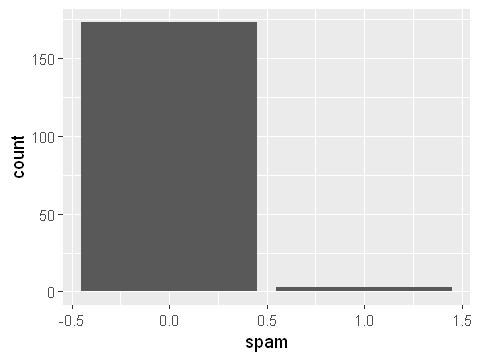

In [8]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)


# Question 1
email %>%
  filter(dollar > 0) %>%
  group_by(spam) %>%
  summarize(median(dollar))

# Question 2
email %>%
  filter(dollar > 10) %>%
  ggplot(aes(x = spam)) +
  geom_bar()

### 4.3) (video) Check-In 2

#### 4.3.1) What's in a number?
Turn your attention to the variable called number. Read more about it by pulling up the help file with ?email.

To explore the association between this variable and spam, select and construct an informative plot. For illustrating relationships between categorical variables, you've seen

    Faceted barcharts
    Side-by-side barcharts
    Stacked and normalized barcharts.
    Let's practice constructing a faceted barchart.

**Exercise**
1. Reorder the levels of number so that they preserve the natural ordering of "none", then "small", then "big".
2. Construct a faceted barchart of the association between number and spam.

*Answer*

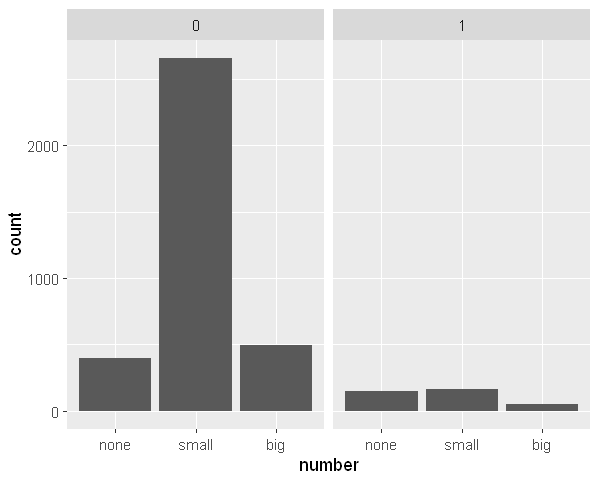

In [10]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=5, repr.plot.height=4)

# Reorder levels
email$number <- factor(email$number, levels = c("none", "small", "big"))

# Construct plot of number
ggplot(email, aes(x = number)) +
  geom_bar() +
  facet_wrap(~ spam)